In [26]:
#Imports
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from pandas.plotting import scatter_matrix

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('display.precision', 3)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
data = pandas.read_csv('./data/Train.csv', sep=',', na_values=".")

In [52]:
data.describe(include='all')

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
count,3000.000,3000.000,3000.000,3000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
unique,NaN,NaN,NaN,1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,135/93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.504,168.591,72.537,NaN,234.030,25.550,126.654,0.932,0.475,47.016,0.930,0.948,0.847,1.423,1.073,0.847,1.033,63.868,1.491,0.792,5.477,5.029,5.956,1.489,0.982,53.486,1.219
std,0.500,9.293,13.191,NaN,24.521,4.367,18.226,0.444,0.210,14.336,0.725,0.856,0.790,1.044,1.124,0.789,1.141,11.756,0.929,0.671,2.585,2.871,3.475,1.035,0.770,20.570,0.721
min,0.000,141.131,32.538,NaN,148.812,12.050,69.867,-0.220,0.200,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.382,0.000,0.000,1.000,0.006,0.002,0.000,0.000,18.000,0.000
25%,0.000,161.630,63.223,NaN,216.757,22.454,114.393,0.561,0.282,36.735,0.000,0.000,0.000,1.000,0.000,0.000,0.000,55.648,1.000,0.000,3.222,2.607,2.873,1.000,0.000,36.000,1.000
50%,1.000,168.216,71.449,NaN,234.377,25.352,126.802,0.940,0.462,46.964,1.000,1.000,1.000,1.000,1.000,1.000,1.000,64.015,2.000,1.000,5.497,5.096,5.957,1.000,1.000,53.000,1.000
75%,1.000,175.523,81.703,NaN,250.647,28.404,139.377,1.295,0.639,56.829,1.000,2.000,1.000,2.000,2.000,1.000,2.000,72.087,2.000,1.000,7.680,7.476,8.991,2.000,2.000,72.000,2.000


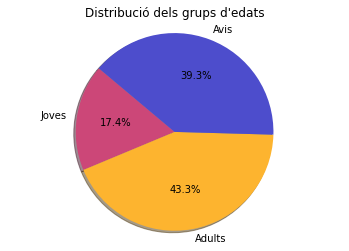

In [29]:
jove = len(data[data['Age_group'] == 0])
adult = len(data[data['Age_group'] == 1])
avi = adults = len(data[data['Age_group'] == 2])

#pie chart
labels = ['Joves', 'Adults', 'Avis']
sizes = [jove, adult, avi]
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0), (0.3, 0.3, 0.8)]

plt.pie(sizes, labels=labels, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribució dels grups d'edats")
plt.show()

In [30]:
#Comprovar quins camps tenen valors nulls
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption             True
Diet                           False
Chronic Diseases                True
Medication Use                  True
Family History                  True
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                 True
Income Level                   False
Age (years)                    False
Age_group                      False
d

In [50]:
values = {"Alcohol Consumption": 'Never', "Chronic Diseases": 'No Disease', "Medication Use": 'No', "Family History": 'No Disease', "Education Level": 'No Education'}
data = data.fillna(value=values)
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption            False
Diet                           False
Chronic Diseases               False
Medication Use                 False
Family History                 False
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                False
Income Level                   False
Age (years)                    False
Age_group                      False
d

<Axes: >

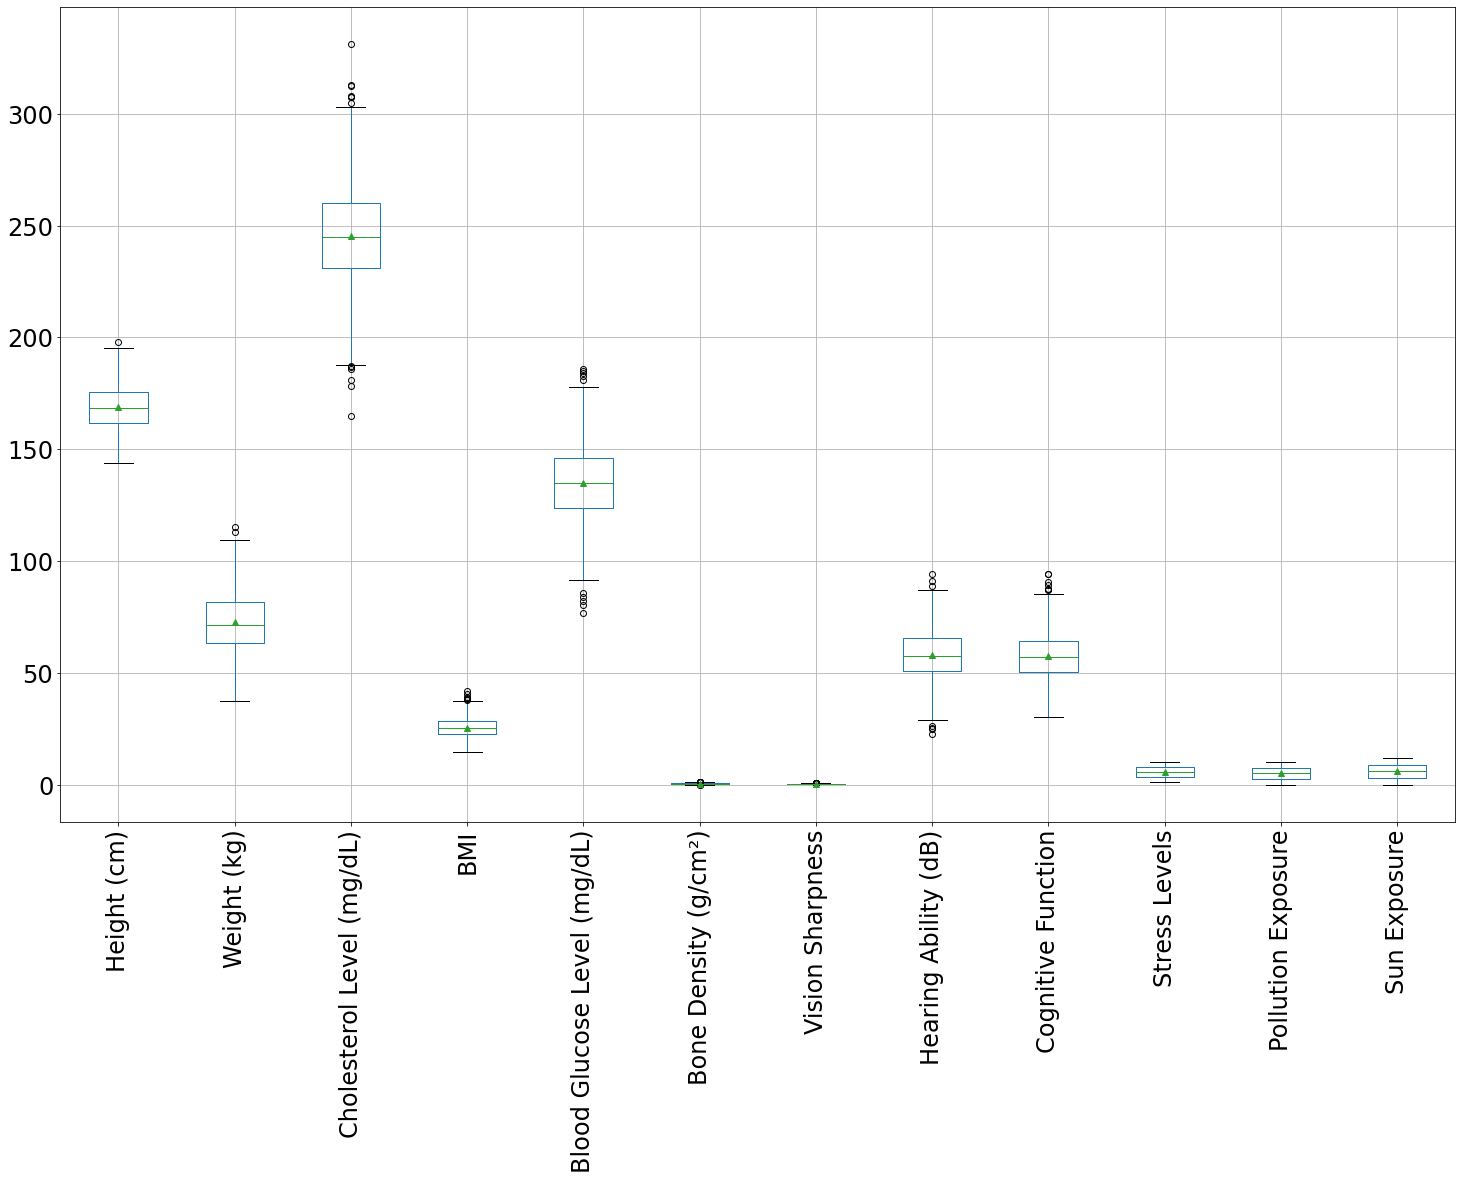

In [32]:
avis = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(avis.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
avis.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

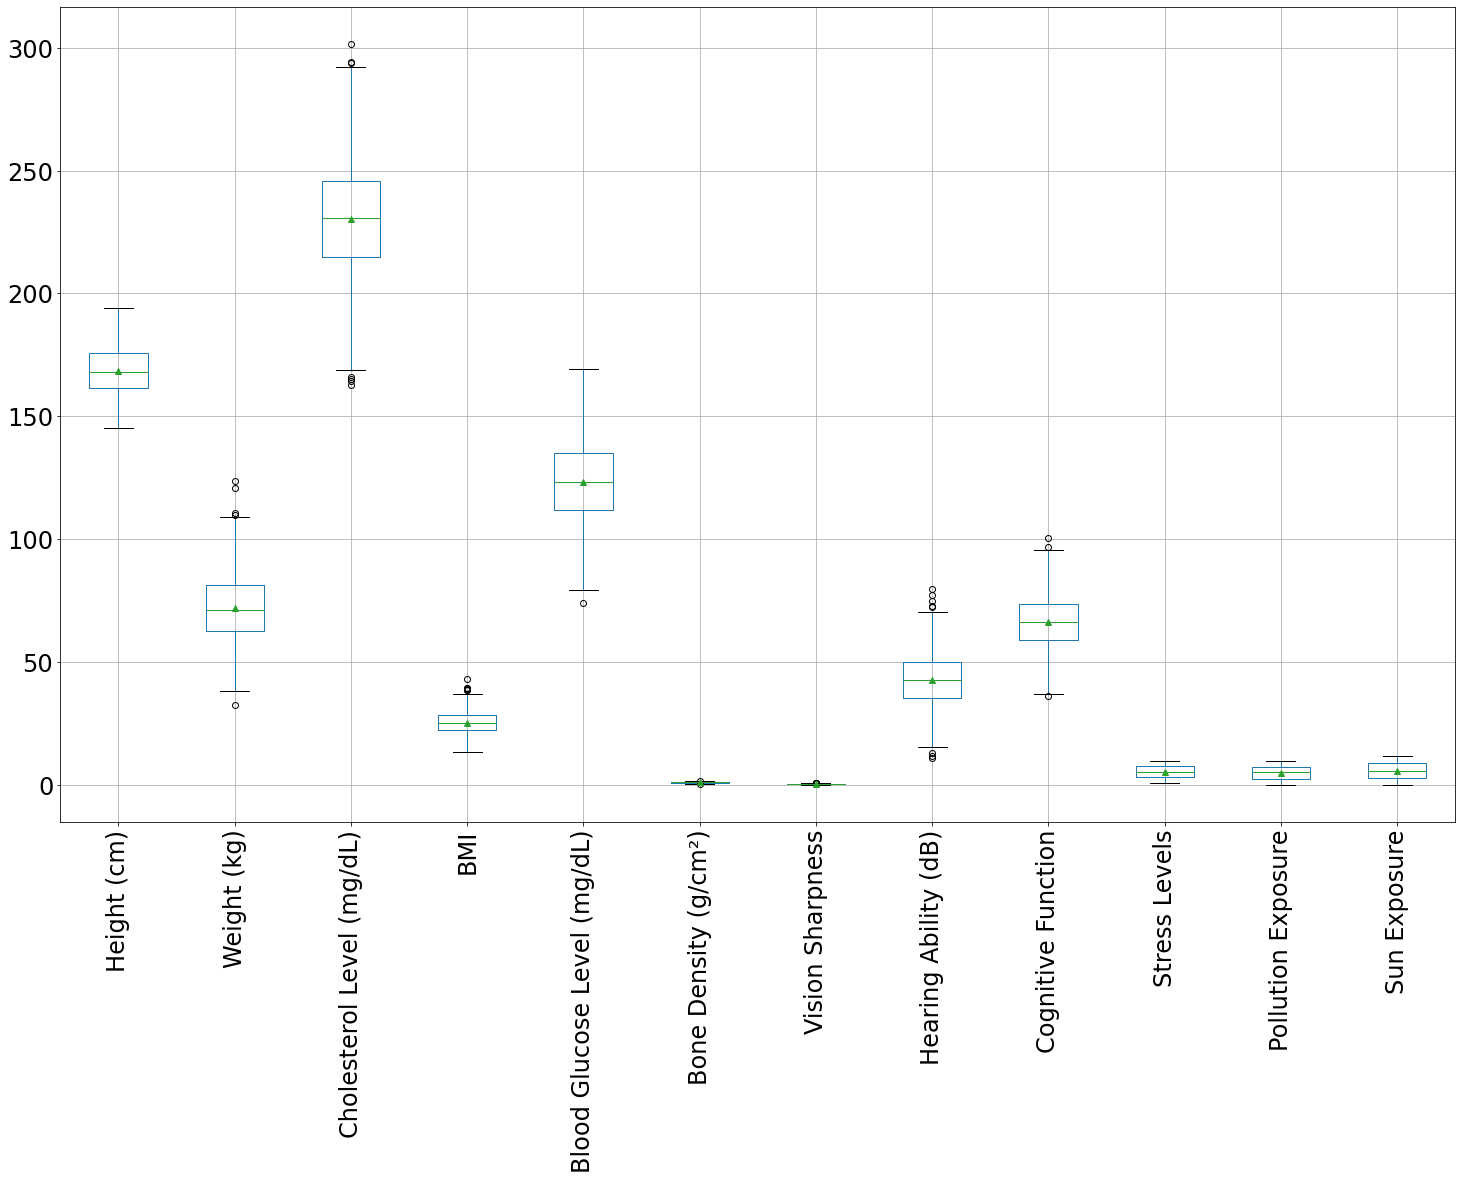

In [33]:
adults = data[data['Age_group'] == 1]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(adults.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
adults.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

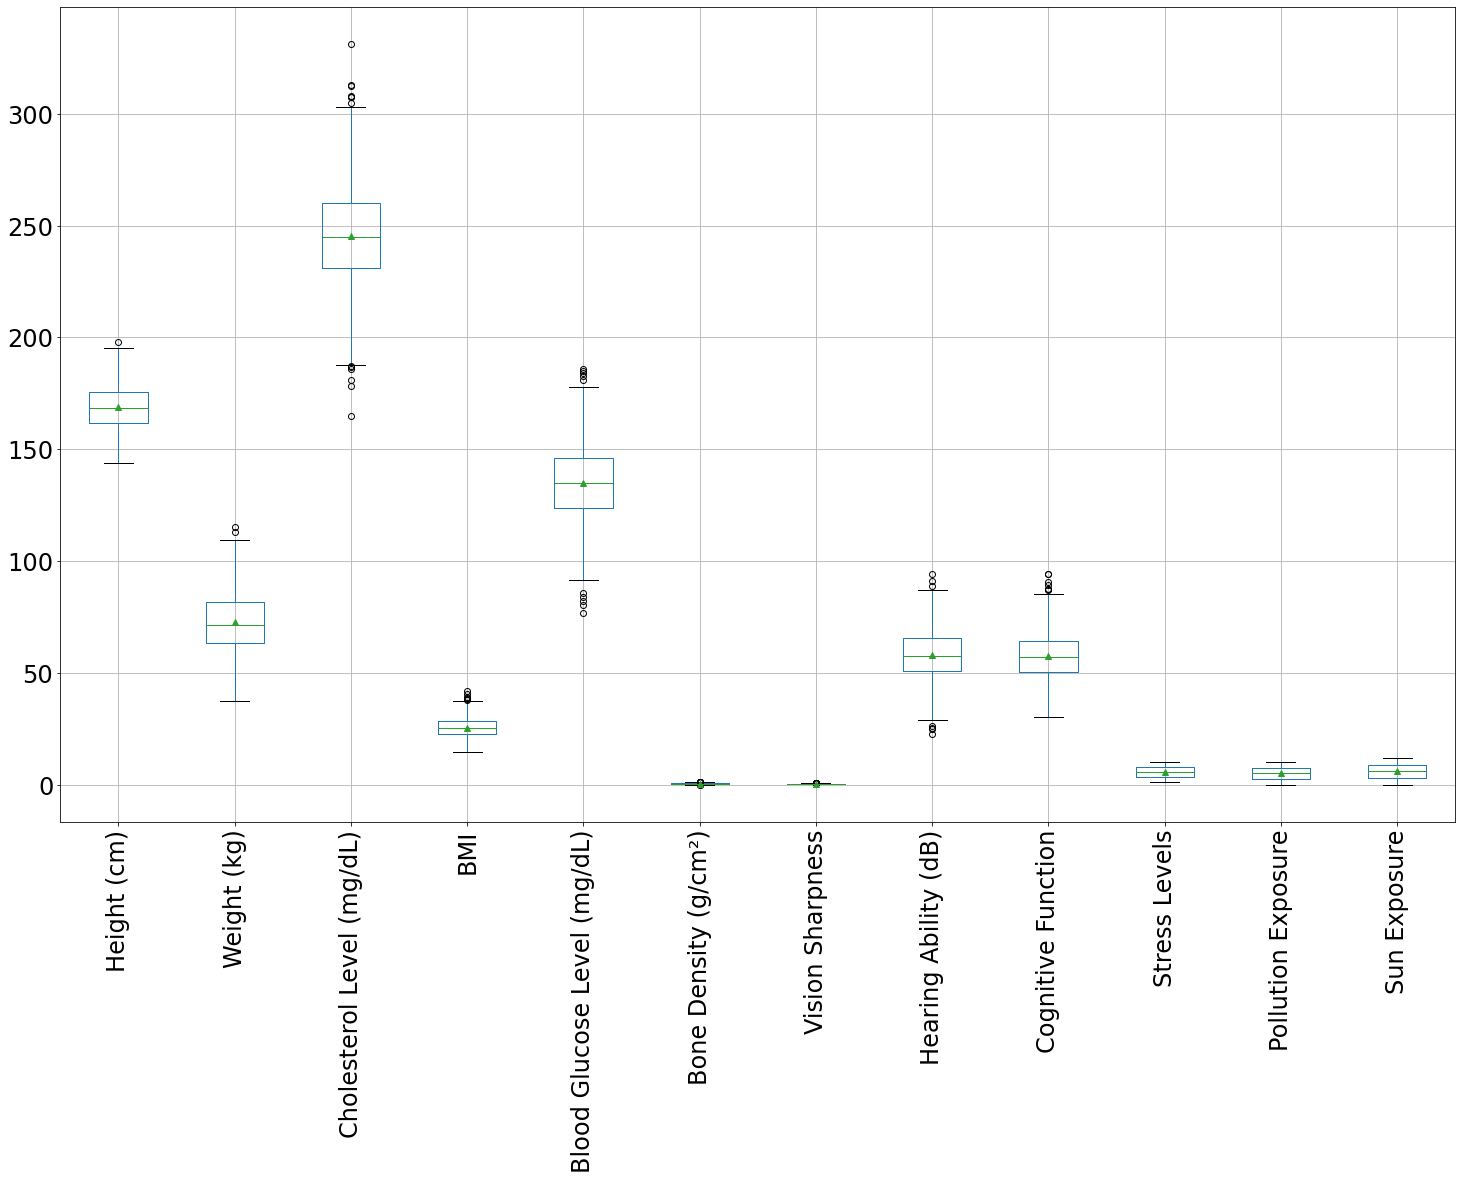

In [34]:
joves = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
joves.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

In [35]:
joves["Height (cm)"].mean()-2*joves["Height (cm)"].std()

np.float64(150.02845770842129)

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
tjoves = []
for c in columns:
    df = pandas.concat([joves[joves[c] > joves[c].mean() + 2*joves[c].std()], joves[joves[c] < joves[c].mean() - 2*joves[c].std()]])
    tjoves.append(df)
tadults = []
for c in columns:
    df = pandas.concat([adults[adults[c] > adults[c].mean() + 2*adults[c].std()], adults[adults[c] < adults[c].mean() - 2*adults[c].std()]])
    tadults.append(df)
tavis = []
for c in columns:
    df = pandas.concat([avis[avis[c] > avis[c].mean() + 2*avis[c].std()], avis[avis[c] < avis[c].mean() - 2*avis[c].std()]])
    tavis.append(df)

In [37]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(joves[columns[n]].mean() + 2*joves[columns[n]].std()) + " i inferiors a " + str(joves[columns[n]].mean() - 2*joves[columns[n]].std()))
tjoves[n]

Cholesterol Level (mg/dL)
Valors superiors a 290.8077459624733 i inferiors a 199.95893811831894


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
49,Male,164.109,76.731,138/99,293.470,28.491,129.859,0.295,0.200,67.878,Low,Former,Never,Low-carb,Diabetes,Regular,Heart Disease,55.952,Fair,Normal,8.778,5.581,6.479,No Education,High,84,2
154,Male,168.118,60.574,149/94,294.867,21.432,137.194,0.808,0.437,64.292,High,Never,Frequent,Balanced,Hypertension,Occasional,No Disease,60.866,Good,Insomnia,4.429,0.546,7.194,Postgraduate,Medium,61,2
199,Male,171.759,63.293,160/101,303.125,21.454,146.701,0.865,0.294,56.748,Low,Never,Never,High-fat,Hypertension,Regular,Diabetes,76.054,Fair,Excessive,3.477,3.980,11.178,High School,High,63,2
241,Male,186.058,74.938,150/104,300.023,21.647,142.552,0.457,0.218,56.287,Low,Former,Occasional,Balanced,Heart Disease,Regular,Hypertension,66.312,Fair,Insomnia,3.379,2.872,6.136,Postgraduate,Low,74,2
297,Female,153.711,67.209,172/103,299.843,28.446,103.569,0.479,0.220,65.983,High,Former,Never,High-fat,Hypertension,Regular,Hypertension,54.700,Good,Normal,3.496,5.002,1.927,High School,Medium,87,2
412,Male,181.227,96.454,164/97,295.737,29.368,167.834,0.609,0.329,68.187,Moderate,Never,Never,Low-carb,No,Occasional,No Disease,58.402,Good,Normal,7.330,8.913,7.630,Postgraduate,Low,69,2
422,Female,169.062,59.232,165/110,301.751,20.724,125.373,0.442,0.228,65.986,Moderate,Current,Occasional,High-fat,No,No,No Disease,65.405,Good,Insomnia,3.475,1.384,1.437,Undergraduate,Low,78,2
454,Female,163.571,77.342,155/94,290.886,28.907,148.526,0.583,0.219,76.746,Moderate,Former,Occasional,Balanced,Diabetes,No,No Disease,58.775,Fair,Insomnia,8.218,7.268,9.520,Undergraduate,Medium,83,2
513,Female,156.831,65.975,177/97,292.875,26.823,126.812,0.148,0.200,50.403,High,Former,Occasional,Vegetarian,Diabetes,Regular,Heart Disease,52.734,Poor,Insomnia,5.259,9.713,4.468,High School,Low,83,2
569,Male,160.643,83.721,168/96,300.439,32.442,177.495,0.403,0.200,62.738,Moderate,Current,Frequent,Vegetarian,Heart Disease,Occasional,Hypertension,47.790,Fair,Normal,2.754,0.811,9.547,High School,High,80,2


In [38]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(adults[columns[n]].mean() + 2*adults[columns[n]].std()) + " i inferiors a " + str(adults[columns[n]].mean() - 2*adults[columns[n]].std()))
tadults[n]

Cholesterol Level (mg/dL)
Valors superiors a 275.038878926934 i inferiors a 185.36714588661684


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
258,Female,157.359,83.987,159/98,291.451,33.918,98.326,1.104,0.496,52.794,High,Former,Never,Balanced,Heart Disease,Regular,Heart Disease,65.494,Fair,Normal,8.353,4.088,3.921,Undergraduate,Low,41,1
604,Male,166.287,78.725,139/98,278.866,28.471,127.683,0.680,0.657,40.845,Moderate,Never,Occasional,High-fat,Heart Disease,No,No Disease,52.802,Fair,Normal,1.359,8.259,5.937,High School,Medium,56,1
914,Female,158.722,65.382,140/87,275.641,25.953,117.593,1.413,0.466,28.394,Moderate,Never,Occasional,Vegetarian,No,Occasional,No Disease,58.931,Good,Insomnia,6.035,0.964,9.587,Postgraduate,Low,34,1
1159,Female,155.360,76.875,148/89,281.459,31.850,108.136,1.212,0.683,48.135,High,Former,Occasional,Vegetarian,No,No,No Disease,65.846,Good,Normal,7.519,0.691,10.588,High School,Medium,39,1
1273,Female,168.606,49.236,122/95,282.058,17.320,128.107,1.211,0.604,47.880,Low,Current,Never,High-fat,Hypertension,No,Hypertension,72.537,Good,Normal,9.166,8.597,0.690,Undergraduate,Medium,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,Female,161.084,67.027,130/88,185.355,25.831,136.851,1.249,0.572,28.344,Moderate,Former,Never,Low-carb,Diabetes,Occasional,Heart Disease,71.380,Poor,Insomnia,1.454,5.407,8.582,Undergraduate,Medium,37,1
2854,Male,174.965,86.531,117/97,183.657,28.266,125.486,0.998,0.566,39.847,High,Former,Frequent,High-fat,Heart Disease,No,No Disease,69.988,Good,Normal,9.521,3.947,11.665,Undergraduate,High,43,1
2860,Male,173.228,94.132,142/94,180.489,31.369,142.330,0.912,0.490,41.612,Moderate,Never,Occasional,Vegetarian,Diabetes,Occasional,Diabetes,67.490,Fair,Insomnia,6.449,6.938,10.010,No Education,High,55,1
2870,Female,161.168,56.497,135/90,183.665,21.750,120.280,1.127,0.540,39.121,High,Never,Occasional,Balanced,Hypertension,Regular,Heart Disease,47.311,Poor,Excessive,9.961,6.189,7.650,No Education,Low,39,1


In [39]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(avis[columns[n]].mean() + 2*avis[columns[n]].std()) + " i inferiors a " + str(avis[columns[n]].mean() - 2*avis[columns[n]].std()))
tavis[n]

Cholesterol Level (mg/dL)
Valors superiors a 290.8077459624733 i inferiors a 199.95893811831894


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
49,Male,164.109,76.731,138/99,293.470,28.491,129.859,0.295,0.200,67.878,Low,Former,Never,Low-carb,Diabetes,Regular,Heart Disease,55.952,Fair,Normal,8.778,5.581,6.479,No Education,High,84,2
154,Male,168.118,60.574,149/94,294.867,21.432,137.194,0.808,0.437,64.292,High,Never,Frequent,Balanced,Hypertension,Occasional,No Disease,60.866,Good,Insomnia,4.429,0.546,7.194,Postgraduate,Medium,61,2
199,Male,171.759,63.293,160/101,303.125,21.454,146.701,0.865,0.294,56.748,Low,Never,Never,High-fat,Hypertension,Regular,Diabetes,76.054,Fair,Excessive,3.477,3.980,11.178,High School,High,63,2
241,Male,186.058,74.938,150/104,300.023,21.647,142.552,0.457,0.218,56.287,Low,Former,Occasional,Balanced,Heart Disease,Regular,Hypertension,66.312,Fair,Insomnia,3.379,2.872,6.136,Postgraduate,Low,74,2
297,Female,153.711,67.209,172/103,299.843,28.446,103.569,0.479,0.220,65.983,High,Former,Never,High-fat,Hypertension,Regular,Hypertension,54.700,Good,Normal,3.496,5.002,1.927,High School,Medium,87,2
412,Male,181.227,96.454,164/97,295.737,29.368,167.834,0.609,0.329,68.187,Moderate,Never,Never,Low-carb,No,Occasional,No Disease,58.402,Good,Normal,7.330,8.913,7.630,Postgraduate,Low,69,2
422,Female,169.062,59.232,165/110,301.751,20.724,125.373,0.442,0.228,65.986,Moderate,Current,Occasional,High-fat,No,No,No Disease,65.405,Good,Insomnia,3.475,1.384,1.437,Undergraduate,Low,78,2
454,Female,163.571,77.342,155/94,290.886,28.907,148.526,0.583,0.219,76.746,Moderate,Former,Occasional,Balanced,Diabetes,No,No Disease,58.775,Fair,Insomnia,8.218,7.268,9.520,Undergraduate,Medium,83,2
513,Female,156.831,65.975,177/97,292.875,26.823,126.812,0.148,0.200,50.403,High,Former,Occasional,Vegetarian,Diabetes,Regular,Heart Disease,52.734,Poor,Insomnia,5.259,9.713,4.468,High School,Low,83,2
569,Male,160.643,83.721,168/96,300.439,32.442,177.495,0.403,0.200,62.738,Moderate,Current,Frequent,Vegetarian,Heart Disease,Occasional,Hypertension,47.790,Fair,Normal,2.754,0.811,9.547,High School,High,80,2


<Axes: xlabel='Age_group'>

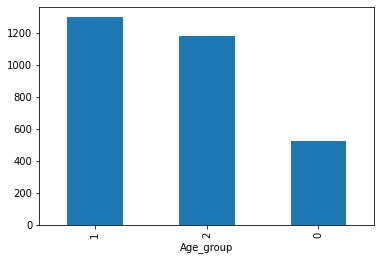

In [40]:
data.Age_group.value_counts().plot(kind='bar')

Scatter matrixes for correlations betwen numerical variables 


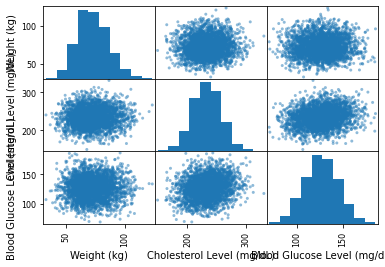

In [41]:
scatter_matrix(data[['Weight (kg)', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)']])
print('Scatter matrixes for correlations betwen numerical variables ')

In [ ]:
# !!! FALTA MIRAR LA PRESSIO !!!!

gender_st = {'Male': 0, 'Female': 1}
data.replace({"Gender": gender_st}, inplace=True)
status_st = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data.replace({"Mental Health Status": status_st}, inplace=True)
smoking_st = {'Former': 0, 'Current': 1, 'Never': 2}
data.replace({"Smoking Status": smoking_st}, inplace=True)
drinking_st = {'Never': 0, 'Occasional': 1, 'Frequent': 2}
data.replace({"Alcohol Consumption": drinking_st}, inplace=True)
medication_st = {'No': 0, 'Regular': 1, 'Occasional': 2}
data.replace({"Medication Use": medication_st}, inplace=True)
physical_st = {'Low': 0, 'Moderate': 1, 'High': 2}
data.replace({"Physical Activity Level": physical_st}, inplace=True)
diet_st = {'Low-carb': 0, 'Balanced': 1, 'Vegetarian': 2, 'High-fat': 3}
data.replace({"Diet": diet_st}, inplace=True)
sleep_st = {'Insomnia': 0, 'Normal': 1, 'Excessive': 2}
data.replace({"Sleep Patterns": sleep_st}, inplace=True)
income_st = {'Low': 0, 'Medium': 1, 'High': 2}
data.replace({"Income Level": income_st}, inplace=True)
education_st = {'No Education': 0, 'Undergraduate': 1, 'High School': 2, 'Postgraduate': 3}
data.replace({"Education Level": education_st}, inplace=True)
chronic_st = {'No Disease': 0, 'Hypertension': 1, 'Diabetes': 2, 'Heart Disease': 3}
data.replace({"Chronic Diseases": chronic_st}, inplace=True)
data.replace({"Family History": chronic_st}, inplace=True)
print(data[:5])

   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)     BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  Physical Activity Level  Smoking Status  Alcohol Consumption  Diet  Chronic Diseases  Medication Use  Family History  Cognitive Function  Mental Health Status  Sleep Patterns  Stress Levels  Pollution Exposure  Sun Exposure  Education Level  Income Level  Age (years)  Age_group
0       0      171.148       86.185              151/109                    259.466  29.423                      157.653                 0.133             0.200                58.786                        1               0                    0     0                 0               0               0              44.059                     2               0          2.797               5.142         7.109                0             1           89          2
1       0      172.946       79.642              134/112                  

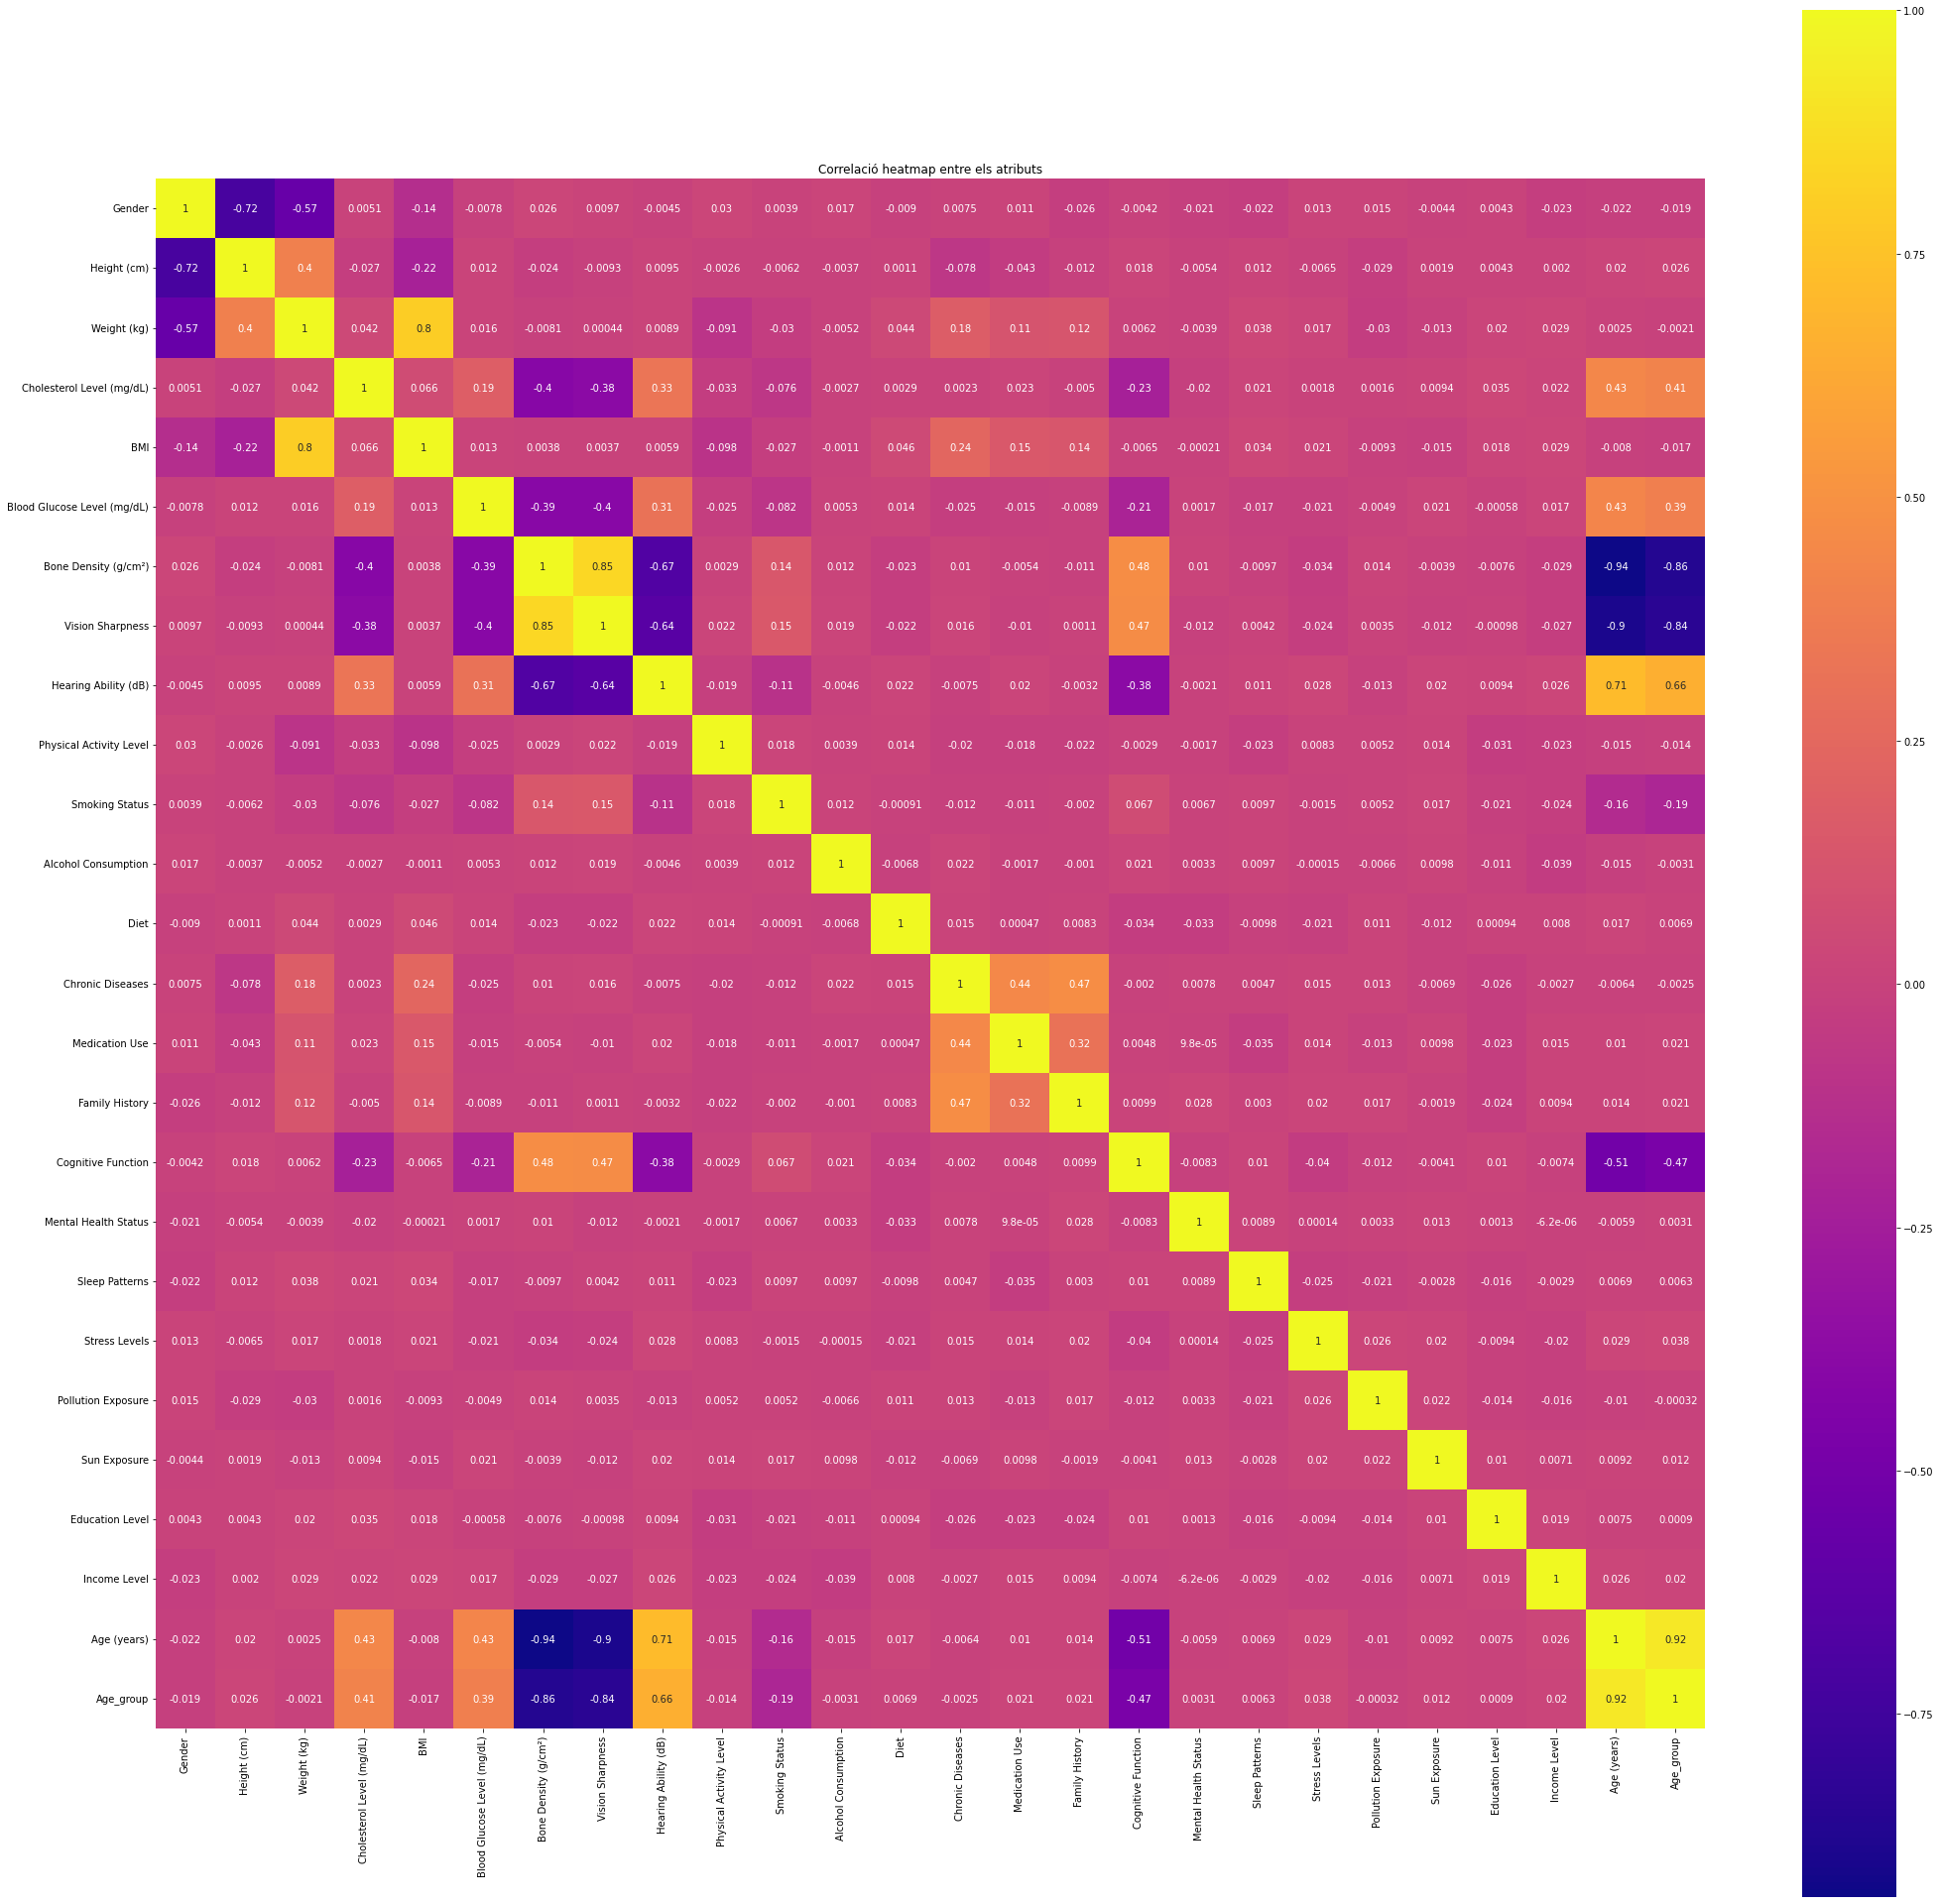

In [53]:
#Passar columnes no numèriques a numèriques
corr = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)

plt.title("Correlació heatmap entre els atributs")
plt.show()